In [43]:
import pyforest
from icecream import ic
rng = np.random.default_rng(42)




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

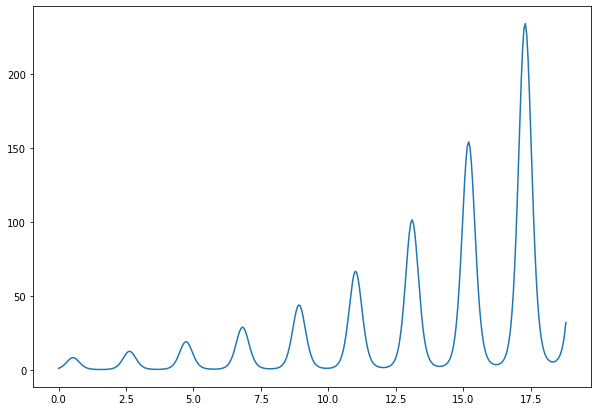

In [44]:
# generate synthethic data

x = np.arange(0, 6 * np.pi, 0.05)
y = np.exp(np.sin(3*x) + 0.1 * x)

# inject random noise (comment out to see noiseless data)
scale = 0.03 # noise scaler
y = y + (rng.random(len(x)) * 2 - 1) * scale * y

y = y**2  # log undefined for <0

# plot it
plt.figure(figsize=(10,7))
plt.plot(x,y);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

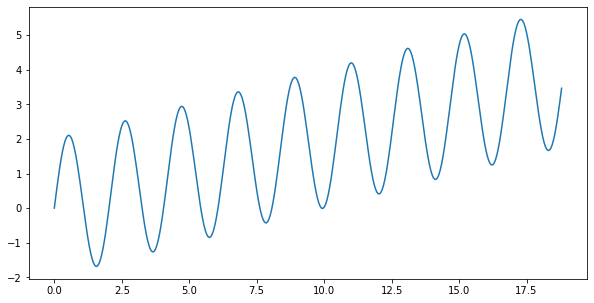

In [45]:
# take the log
plt.figure(figsize=(10,5))
plt.plot(x,np.log(y));

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

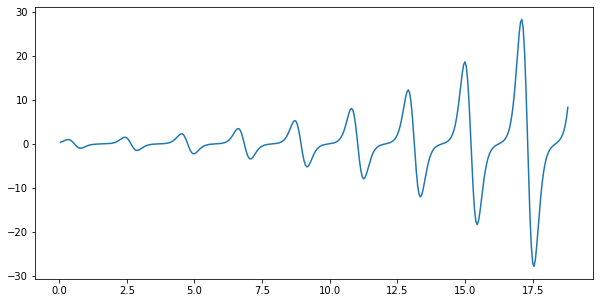

In [46]:
# take the diff
diffy = np.diff(y, n=1)

plt.figure(figsize=(10,5))
plt.plot(x[1:], diffy);


In [47]:
# diff version has 1 less measurement than original
ic(len(y))
ic(len(diffy));

ic| len(y): 377
ic| len(diffy): 376


In [48]:
# does not equate.  You have to use the non-diffed data
# but because the every measurement in a time series is related to the measurement before and after it,
# using the cumsum will APPROXIMATE the inversion.  It can be used if you don't have the original data, 
# but it's always best to hang on to the original.
ic(np.cumsum(diffy)[:10])
ic((y[:-1] + diffy)[:10])

<IPython.core.display.Javascript object>

ic| np.cumsum(diffy)[:10]: array([0.36189385, 0.8423472 , 1.45943357, 2.21968957, 3.109402  ,
                                  4.08682477, 5.07903795, 5.9871879 , 6.70174338, 7.1253595 ])
ic| (y[:-1] + diffy)[:10]: array([1.36189385, 1.8423472 , 2.45943357, 3.21968957, 4.109402  ,
                                  5.08682477, 6.07903795, 6.9871879 , 7.70174338, 8.1253595 ])


array([1.36189385, 1.8423472 , 2.45943357, 3.21968957, 4.109402  ,
       5.08682477, 6.07903795, 6.9871879 , 7.70174338, 8.1253595 ])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

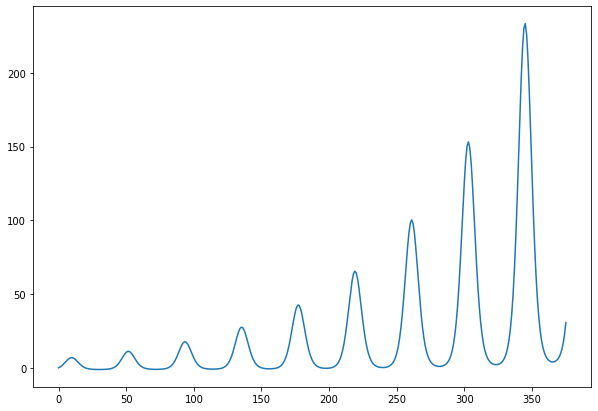

In [49]:
# inverting the diff (by itself)
plt.figure(figsize=(10,7))
# plt.plot(x[1:], y[:-1] + diffy)
plt.plot(np.cumsum(diffy))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

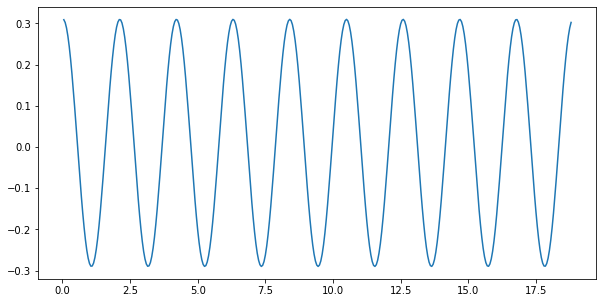

In [50]:
# taking the diff of the log and we're left with a base sinusoid (+- scaled noise)
ylog = np.log(y)
ydifflog = np.diff(ylog)

plt.figure(figsize=(10,5))
plt.plot(x[1:], ydifflog)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

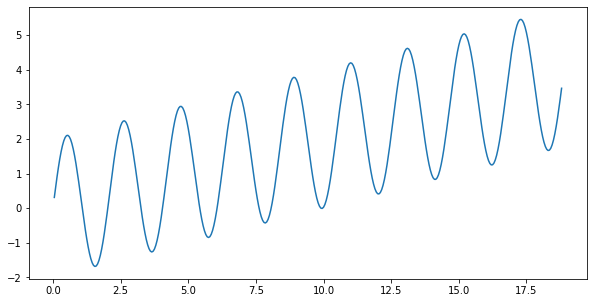

In [51]:
# inverting the diff
plt.figure(figsize=(10,5))
plt.plot(x[1:], ylog[:-1] + ydifflog)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

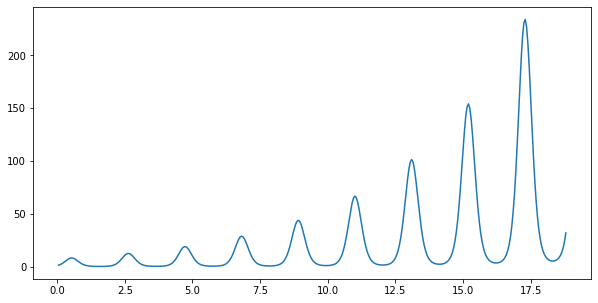

In [52]:
# inverting the diff and then inverting the log to get us back to the original
plt.figure(figsize=(10,5))
plt.plot(x[1:], np.exp(ylog[:-1] + ydifflog))

# Some Notes

Lag 1 will mean that we will have lost 1 measurement forever.  That's why we see the adjustments `[:-1]`
You can adjust it for the magnitude of the lag


In [53]:
# test the "first" values are the same
np.round(np.exp(ylog[:-1] + ydifflog)[0], 6) == np.round(y[1], 6)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

True

In [54]:
# test the last values are the same
np.round(np.exp(ylog[:-1] + ydifflog)[-1], 6) == np.round(y[-1], 6)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

True

In [55]:
# test that all the values are the same
np.all(np.round(np.exp(ylog[:-1] + ydifflog), 6) == np.round(y[1:], 6))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

True

In [56]:
# resolution of np.float32 is 1e-6 so we have to round the above to a max of 6 decimal places 
print(np.finfo(np.float32))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
---------------------------------------------------------------

